# Project Overview
This project aims to enhance trading strategies and maximize returns by leveraging insights derived from historical stock market data trends, including stock prices, volatility, and trading volume. By analyzing these factors, the project provides actionable insights to help investors optimize their trading decisions.

Our approach focuses on identifying patterns such as price volatility trends, the correlation between trading volume and price fluctuations, and seasonality in stock performance. These insights enable investors to align their strategies with market trends and predictive analytics.

Key Benefits:

- Improved trading efficiency and profitability through data-driven insights.
- Volatility-based risk assessment strategies to mitigate market risks.
- A systematic approach to guide investors on buy/sell/hold decisions based on historical patterns and predictive models.

Imagine you are an investor eager to make informed trading decisions in a volatile stock market. This project helps you answer critical questions like:

Are there specific periods when stock prices are more stable or volatile?

How does trading volume influence price movements, and how can that be leveraged for decision-making?

What historical patterns can you rely on to predict stock behavior during certain months or years?

The insights generated from this analysis provide the tools needed to minimize risks and maximize returns, ensuring that your investments are aligned with market trends and predictive models. With an in-depth understanding of Google stock performance over the years, you gain the confidence to make strategic decisions tailored to market dynamics.

## Initial Data Exploration

In [358]:
# Importing libraries for data analysis and visualization

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns  
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind, f_oneway, pearsonr 
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression, LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report  


In [359]:
df = pd.read_csv('C:/Users/Elif Surucu/Documents/Flatiron/Assesments/Project4/Google-Stock-Market-Data/df.csv')

df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401
6,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.643840,124826132
7,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.540727,104429967
8,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.549693,98825037
9,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.496891,183633734


In [360]:
df.isnull().sum()
df.duplicated().sum()

0

In [361]:
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4931,2024-03-22,150.240005,152.559998,150.089996,151.770004,151.770004,19226300
4932,2024-03-25,150.949997,151.455994,148.800003,151.149994,151.149994,15114700
4933,2024-03-26,151.240005,153.199997,151.029999,151.699997,151.699997,19312700
4934,2024-03-27,152.145004,152.690002,150.130005,151.940002,151.940002,16622000


In [362]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4936,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4.936000e+03
mean,2014-06-07 17:09:49.303079424,43.077417,43.532659,42.644088,43.096952,43.096952,1.174059e+08
min,2004-08-19 00:00:00,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,2009-07-14 18:00:00,12.923497,13.048528,12.787071,12.922438,12.922438,2.803600e+07
50%,2014-06-09 12:00:00,26.795184,26.966079,26.570000,26.763133,26.763133,5.875273e+07
75%,2019-05-03 18:00:00,58.855251,59.352863,58.164000,58.788999,58.788999,1.453859e+08
max,2024-03-28 00:00:00,154.009995,155.199997,152.919998,154.839996,154.839996,1.650833e+09
std,NaN,40.320485,40.773849,39.917290,40.352092,40.352092,1.505185e+08


General Observations:

Data Summary:
- Covers 4936 rows, ranging from 2004-08-19 to 2024-03-28.
- Columns like Open, High, Low, Close, and Volume are complete and consistent.

Price Ranges:

- Prices range between ~$2.5 and $155, with an average around $43.
- Median prices (~$27) suggest positive skewness in stock prices.

Volume:

- Trading volume varies widely, from 158,434 to 1.65 billion shares, with a mean of ~117 million.

Variability:

- High standard deviations in prices (~$40) and volume indicate significant fluctuations over time.


# Descriptive Analysis Questions

1. What is the annual trend of Google stock prices over the years?
2. Which year experienced the highest average trading volume?
3. What is the average daily price volatility (difference between high and low prices)?
4. How does the closing price correlate with trading volume?
5. Which months typically experience higher trading volumes and volatility?
6. What is the historical pattern of stock price spikes or drops over the years?


In [363]:
#1. What is the annual trend of Google stock prices over the years?

df['Year'] = df['Date'].dt.year
annual_trend = df.groupby('Year')['Close'].mean()


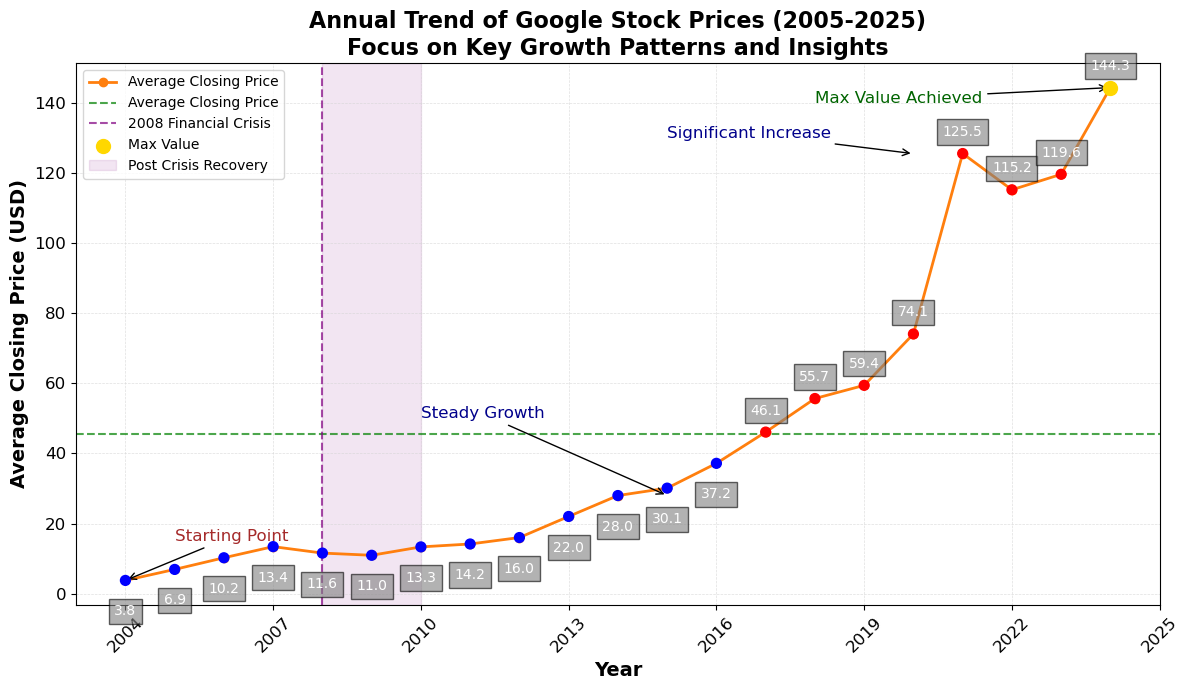

In [364]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Create the figure
plt.figure(figsize=(12, 7))

# Plot the trend line
plt.plot(
    annual_trend.index, 
    annual_trend.values, 
    marker='o', 
    color='#FF7F0E', 
    linewidth=2, 
    label='Average Closing Price'
)

# Color coding based on the mean
colors = ['red' if value > annual_trend.mean() else 'blue' for value in annual_trend.values]
plt.scatter(annual_trend.index, annual_trend.values, c=colors, s=50, zorder=5)

# Add title
plt.title("Annual Trend of Google Stock Prices (2005-2025)\nFocus on Key Growth Patterns and Insights", fontsize=16, fontweight='bold')

# Add X and Y axis labels
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Average Closing Price (USD)", fontsize=14, fontweight='bold')

# Annotate significant points
plt.annotate('Significant Increase', xy=(2020, 125.5), xytext=(2015, 130),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='darkblue')

plt.annotate('Steady Growth', xy=(2015, 28.0), xytext=(2010, 50),
             arrowprops=dict(facecolor='blue', arrowstyle='->'),
             fontsize=12, color='darkblue')

plt.annotate('Starting Point', xy=(annual_trend.index[0], annual_trend.iloc[0]), xytext=(2005, 15),
             arrowprops=dict(facecolor='brown', arrowstyle='->'),
             fontsize=12, color='brown')

# Add a horizontal line for the average
plt.axhline(y=annual_trend.mean(), color='green', linestyle='--', alpha=0.7, label='Average Closing Price')

# Highlight 2008 financial crisis
plt.axvline(x=2008, color='purple', linestyle='--', alpha=0.7, label='2008 Financial Crisis')

# Highlight maximum value
max_year = annual_trend.idxmax()
max_value = annual_trend.max()
plt.scatter(max_year, max_value, color='gold', s=100, zorder=5, label='Max Value')
plt.annotate('Max Value Achieved', xy=(max_year, max_value), xytext=(2018, 140),
             arrowprops=dict(facecolor='gold', arrowstyle='->'),
             fontsize=12, color='darkgreen')

# Highlight a shaded region (e.g., post-crisis recovery)
plt.axvspan(2008, 2010, color='purple', alpha=0.1, label='Post Crisis Recovery')

# Adjust the axes
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)

# Rotate X-axis labels and adjust ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add data values to points
for year, value in zip(annual_trend.index, annual_trend.values):
    offset = 5 if value > annual_trend.mean() else -10
    plt.text(year, value + offset, f'{value:.1f}', fontsize=10, ha='center', 
             color='white', bbox=dict(facecolor='gray', alpha=0.6))

# Add a legend
plt.legend(fontsize=10, loc='upper left')

# Optimize layout and show the plot
plt.tight_layout()
plt.show()


The chart highlights Google stock price trends from 2005 to 2025, showcasing key milestones. 

The sharp increase during the 2018–2022 period points to factors such as new product launches, market expansion or technological innovations. By following similar catalysts, we can identify future opportunities.

The “Steady Growth” and “Post-Crisis Recovery” periods show that long-term investors are rewarded. This encourages a more patient and sustainable investment strategy.


In [365]:
# 2. Which year experienced the highest average trading volume?

annual_volume = df.groupby('Year')['Volume'].mean()

highest_volume_year = annual_volume.idxmax()
highest_volume = annual_volume.max()

print(f"The year with the highest average trading volume is {highest_volume_year} with a volume of {highest_volume:.2f}.")



The year with the highest average trading volume is 2005 with a volume of 429169259.64.


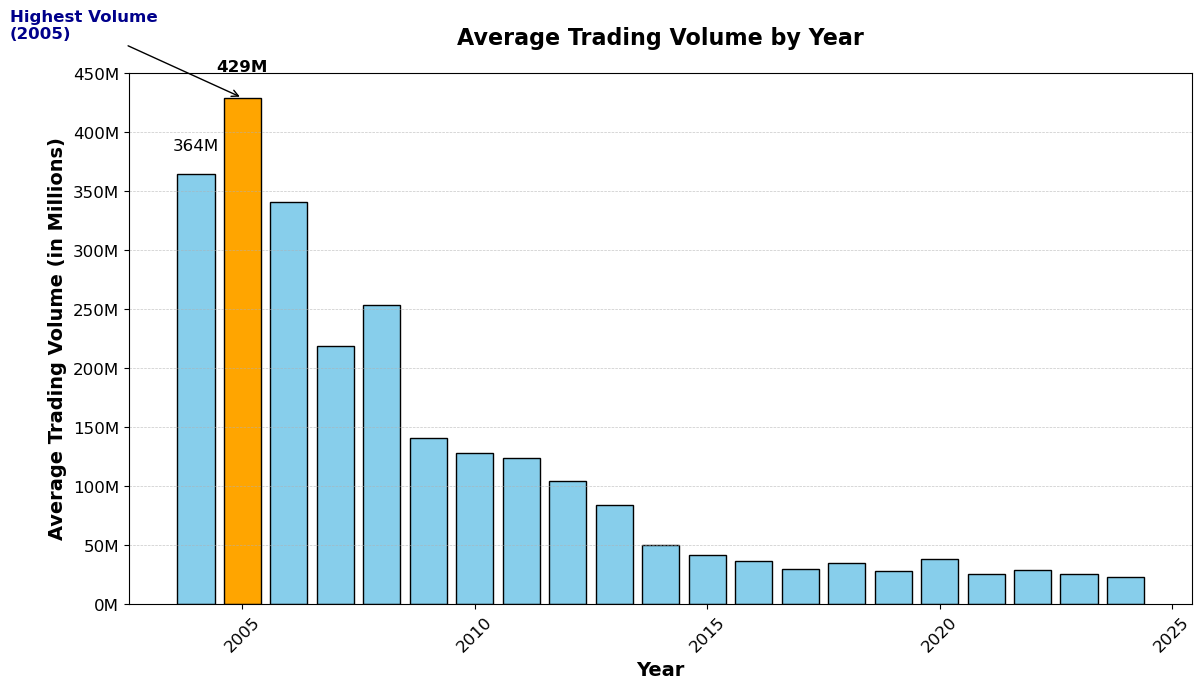

In [366]:
# Define the year and volume with the highest average trading volume
annual_volume_millions = annual_volume / 1e6  
highlight_year = annual_volume_millions.idxmax()  
highlight_value = annual_volume_millions.max() 

plt.figure(figsize=(12, 7))
bars = plt.bar(
    annual_volume_millions.index, 
    annual_volume_millions, 
    color=['skyblue' if year != highlight_year else 'orange' for year in annual_volume_millions.index],
    edgecolor='black'  
)


plt.text(highlight_year, highlight_value + 20, f'{highlight_value:.0f}M', 
         ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
plt.text(annual_volume_millions.index[0], annual_volume_millions.iloc[0] + 20, 
         f'{annual_volume_millions.iloc[0]:.0f}M', ha='center', fontsize=12, color='black')


plt.annotate(f'Highest Volume\n({highlight_year})', 
             xy=(highlight_year, highlight_value), 
             xytext=(highlight_year - 5, highlight_value + 50), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
             fontsize=12, color='darkblue', fontweight='bold')


plt.title("Average Trading Volume by Year", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Average Trading Volume (in Millions)", fontsize=14, fontweight='bold')

plt.yticks(range(0, int(annual_volume_millions.max()) + 50, 50), 
           [f'{i}M' for i in range(0, int(annual_volume_millions.max()) + 50, 50)], fontsize=12)


plt.xticks(fontsize=12, rotation=45)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


This chart effectively showcases Google stock's trading trends over two decades, offering actionable insights for long-term strategy planning.
Investigating specific events or market conditions during high-volume years like 2005 can provide valuable insights into factors influencing investor decisions.

In [367]:
# 3. What is the average daily price volatility (high-low difference)?

df['Volatility'] = df['High'] - df['Low']
average_volatility = df['Volatility'].mean()

print(f"The average daily price volatility is {average_volatility:.2f}.")


The average daily price volatility is 0.89.


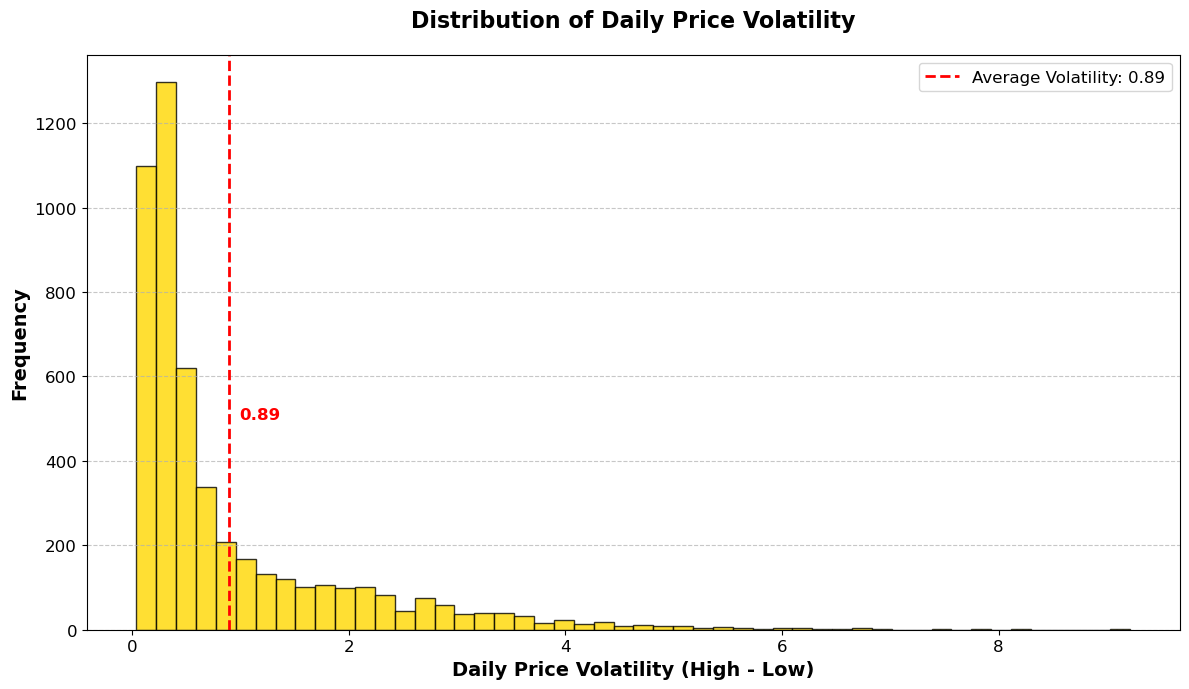

In [368]:
# Histogram for daily price volatility
plt.figure(figsize=(12, 7))

# Plot histogram with enhanced binning and color
plt.hist(df['Volatility'], bins=50, color='gold', edgecolor='black', alpha=0.8)

# Add a vertical line for the average volatility
average_volatility = df['Volatility'].mean()
plt.axvline(average_volatility, color='red', linestyle='--', linewidth=2, label=f'Average Volatility: {average_volatility:.2f}')

# Annotate the average volatility
plt.text(average_volatility + 0.1, 500, f'{average_volatility:.2f}', color='red', fontsize=12, fontweight='bold')

# Title and axis labels
plt.title("Distribution of Daily Price Volatility", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Daily Price Volatility (High - Low)", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust tick parameters for readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend for the average line
plt.legend(fontsize=12, loc='upper right')

# Optimize layout and display the plot
plt.tight_layout()
plt.show()



The majority of daily price volatility values are clustered below 1.0, with the highest frequency occurring in the range of 0.0 to 0.5.
This indicates that Google stock prices typically experience very minimal fluctuations during a trading day.

The average daily price volatility is approximately 0.89, as shown by the red dashed line.
Most days have price changes close to this value, signifying a relatively stable stock.

Focus on the stock's stability, as low daily volatility makes Google stock an appealing option for risk-averse investors.
Use this stability to align with long-term investment strategies, as drastic price changes are unlikely to disrupt portfolio performance.

This analysis positions both investors and traders to leverage Google's consistent price behavior effectively while staying prepared for occasional high-volatility scenarios.

In [369]:
#4.How does the closing price correlate with trading volume?

# Correlation calculation
correlation = df['Close'].corr(df['Volume'])
print(f"The correlation between closing price and trading volume is {correlation:.2f}")


The correlation between closing price and trading volume is -0.47


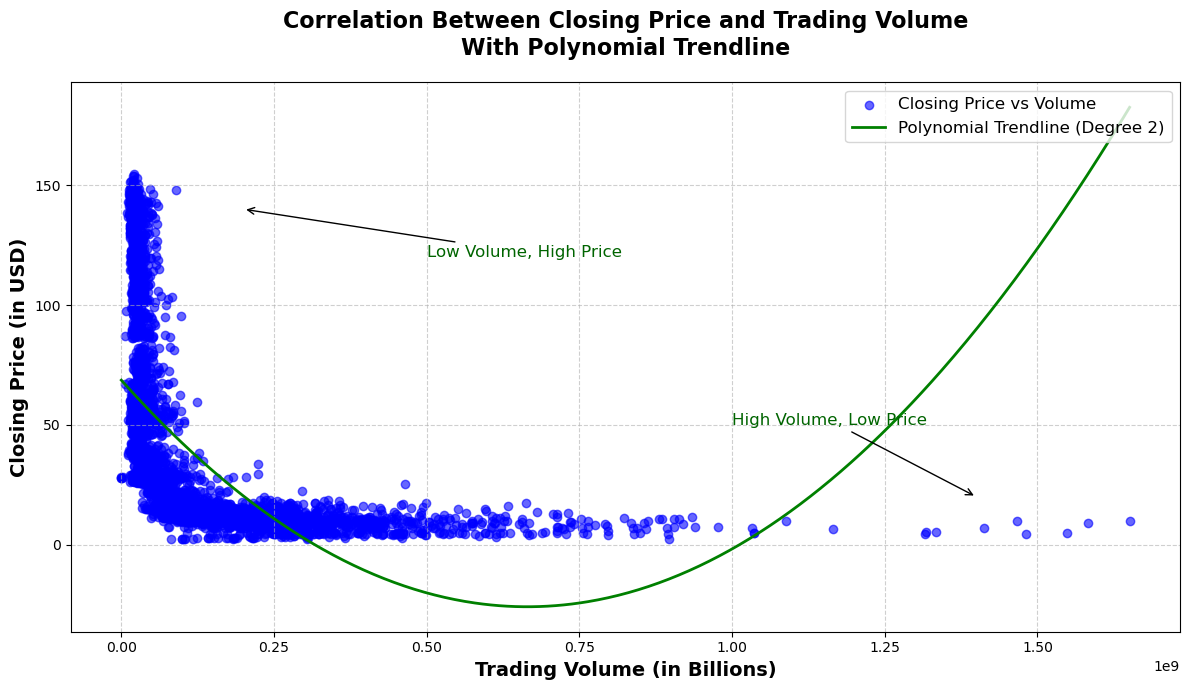

In [370]:
z = np.polyfit(df['Volume'], df['Close'], 2)
p = np.poly1d(z)

# Scatter plot with the new polynomial trendline
plt.figure(figsize=(12, 7))
plt.scatter(df['Volume'], df['Close'], alpha=0.6, color='blue', label='Closing Price vs Volume')

# Adding the polynomial trendline
x_vals = np.linspace(df['Volume'].min(), df['Volume'].max(), 500)
plt.plot(x_vals, p(x_vals), color='green', linewidth=2, label='Polynomial Trendline (Degree 2)')

# Title and labels
plt.title("Correlation Between Closing Price and Trading Volume\nWith Polynomial Trendline", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Trading Volume (in Billions)", fontsize=14, fontweight='bold')
plt.ylabel("Closing Price (in USD)", fontsize=14, fontweight='bold')

# Annotate key points (optional)
plt.annotate("High Volume, Low Price", xy=(1.4e9, 20), xytext=(1.0e9, 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='darkgreen')
plt.annotate("Low Volume, High Price", xy=(0.2e9, 140), xytext=(0.5e9, 120),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='darkgreen')

# Adding legend
plt.legend(fontsize=12, loc='upper right')

# Adding grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the updated plot
plt.tight_layout()
plt.show()

This chart shows the relationship between trading volume and closing price and the polynomial trendline that helps us better understand this relationship.
Premium investments are usually traded with low volume. This may be the case for high value stocks or markets with low liquidity.

When mass investors are active, trading volume increases, but this is usually associated with lower prices.

When trading volume exceeds a certain level, prices start to rise again. This indicates that the market may be showing a recovery or a new surge in demand.
Focusing on Low Volume and High Value stocks may be suitable for more stable and long-term investments.

Short-term opportunities can be sought in High Volume, Rising Price stocks.


In [371]:
#5.Which months typically experience higher trading volumes and volatility?

# Adding month column
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Calculating average trading volume and volatility per month
monthly_volume = df.groupby('Month')['Volume'].mean()
monthly_volatility = df.groupby('Month').apply(lambda x: (x['High'] - x['Low']).mean())



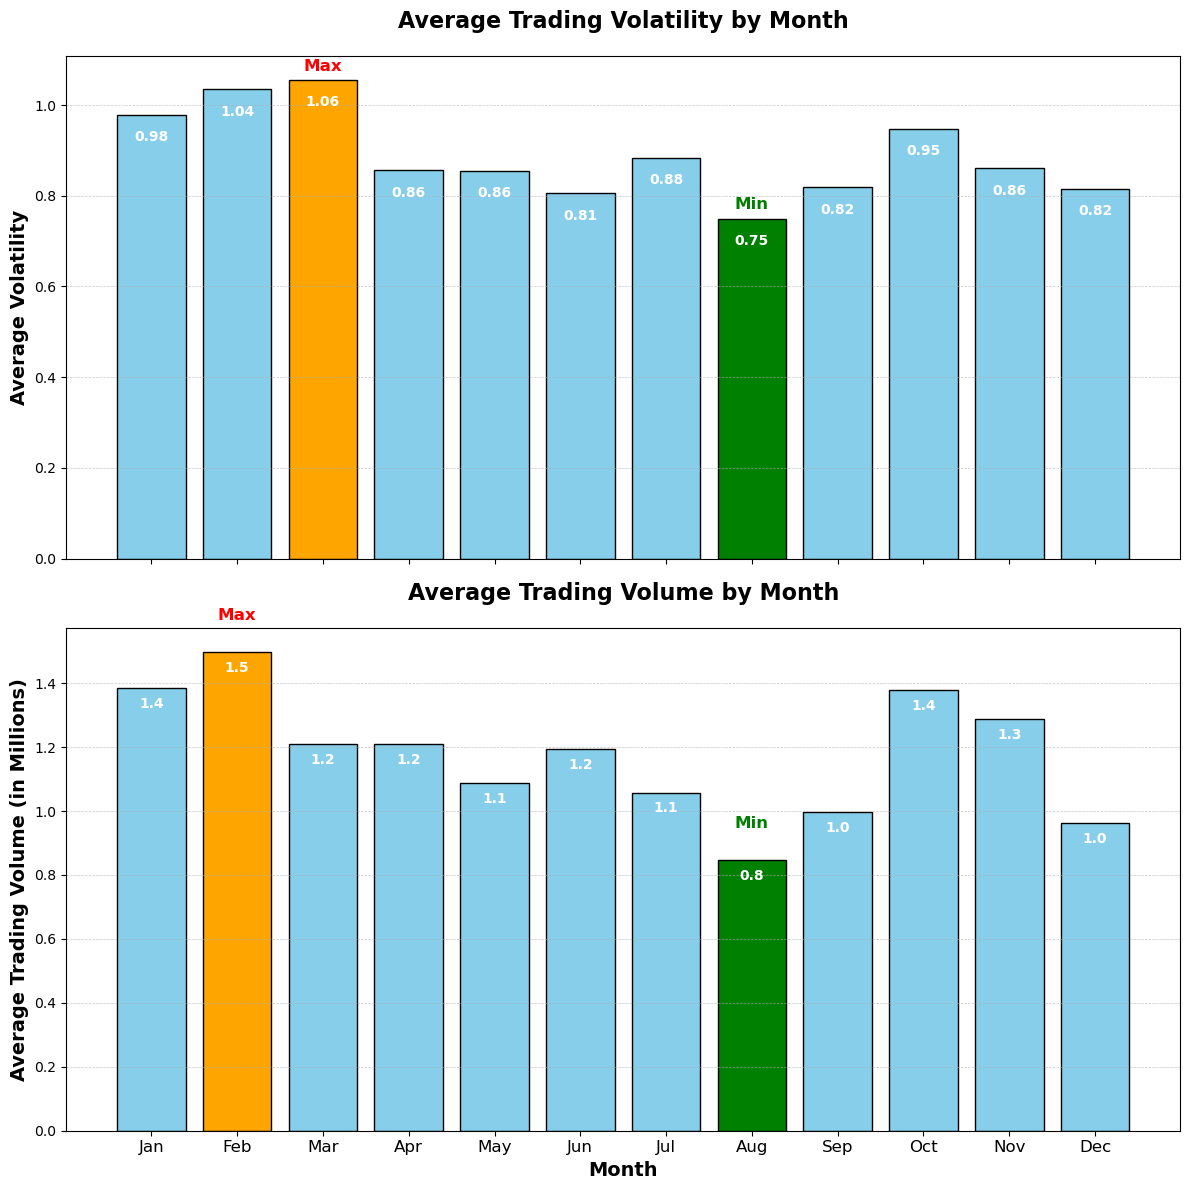

In [372]:
# Identify the months with max and min values for volatility and volume
highlight_max_volatility_month = monthly_volatility.idxmax()
highlight_min_volatility_month = monthly_volatility.idxmin()
highlight_max_volume_month = monthly_volume.idxmax()
highlight_min_volume_month = monthly_volume.idxmin()
# Months label list
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot 1: Average Trading Volatility by Month
bars_volatility = axes[0].bar(
    monthly_volatility.index,
    monthly_volatility,
    color=['orange' if month == highlight_max_volatility_month else
           'green' if month == highlight_min_volatility_month else
           'skyblue' for month in monthly_volatility.index],
    edgecolor='black'
)
# Add value labels inside bars
for bar, value in zip(bars_volatility, monthly_volatility):
    axes[0].text(bar.get_x() + bar.get_width() / 2, value - 0.05,
                 f'{value:.2f}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Annotate Max and Min
axes[0].text(highlight_max_volatility_month, monthly_volatility[highlight_max_volatility_month] + 0.02, 
             'Max', ha='center', fontsize=12, color='red', fontweight='bold')
axes[0].text(highlight_min_volatility_month, monthly_volatility[highlight_min_volatility_month] + 0.02, 
             'Min', ha='center', fontsize=12, color='green', fontweight='bold')

axes[0].set_title("Average Trading Volatility by Month", fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel("Average Volatility", fontsize=14, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot 2: Average Trading Volume by Month
bars_volume = axes[1].bar(
    monthly_volume.index,
    monthly_volume / 1e8,
    color=['orange' if month == highlight_max_volume_month else
           'green' if month == highlight_min_volume_month else
           'skyblue' for month in monthly_volume.index],
    edgecolor='black'
)
# Add value labels inside bars
for bar, value in zip(bars_volume, monthly_volume / 1e8):
    axes[1].text(bar.get_x() + bar.get_width() / 2, value - 0.05,
                 f'{value:.1f}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Annotate Max and Min
axes[1].text(highlight_max_volume_month, (monthly_volume[highlight_max_volume_month] / 1e8) + 0.1, 
             'Max', ha='center', fontsize=12, color='red', fontweight='bold')
axes[1].text(highlight_min_volume_month, (monthly_volume[highlight_min_volume_month] / 1e8) + 0.1, 
             'Min', ha='center', fontsize=12, color='green', fontweight='bold')

axes[1].set_title("Average Trading Volume by Month", fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel("Month", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Average Trading Volume (in Millions)", fontsize=14, fontweight='bold')
axes[1].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Set x-axis ticks and labels for both plots
for ax in axes:
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(months_labels, fontsize=12)

# Optimize layout and display
plt.tight_layout()
plt.show()


1. Average Trading Volatility (Chart Above)
- March: Opportunities for short-term gains, but high risk.
- August: Less risky, suitable for long-term investments.
2. Average Trading Volume (Chart Below)
- February: Suitable for large volume transactions.
- August: Large transactions should be avoided due to low liquidity in the market.

High Volatility and Volume (March and February): Suitable for more active and risky transactions. 

Low Volatility and Volume (August): Can be preferred for safer and longer-term investments.


In [373]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
yearly_avg_close = df.groupby('Year')['Close'].mean()
yearly_change = yearly_avg_close.pct_change() * 100

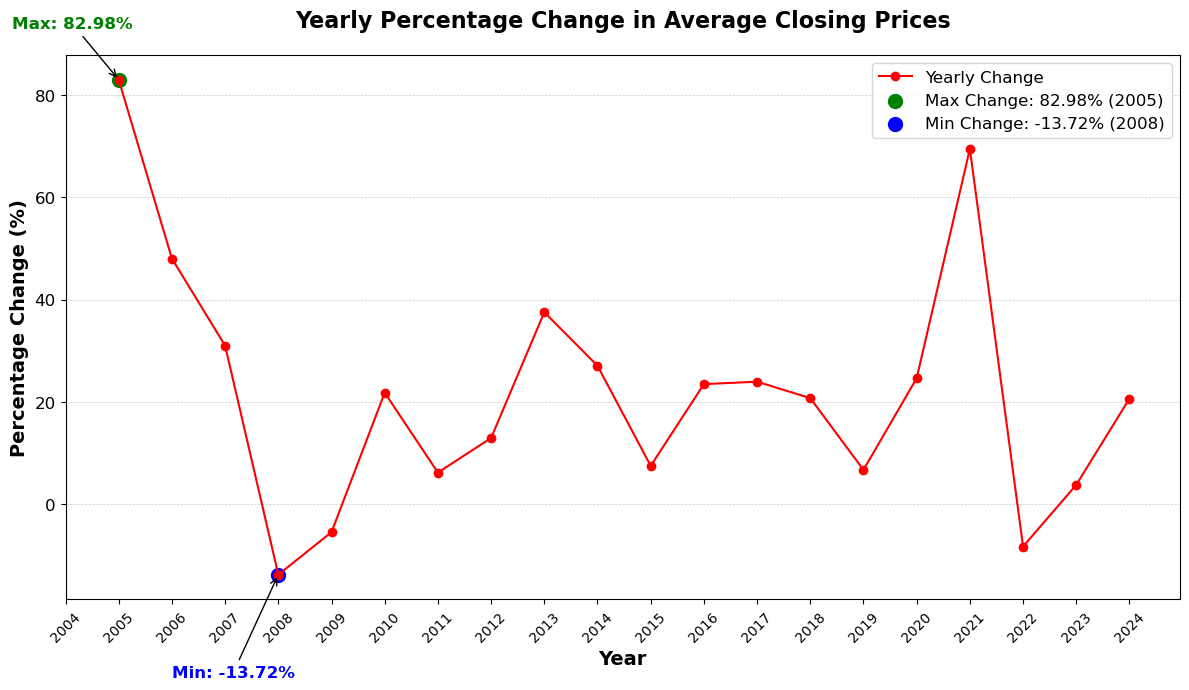

In [374]:
#6.What is the historical pattern of stock price spikes or drops over the years?

# Calculate maximum and minimum yearly percentage changes
max_year = yearly_change.idxmax()
max_value = yearly_change.max()
min_year = yearly_change.idxmin()
min_value = yearly_change.min()

# Plotting the enhanced graph
plt.figure(figsize=(12, 7))

# Line plot with markers
plt.plot(yearly_change.index, yearly_change.values, marker='o', linestyle='-', color='red', label="Yearly Change")

# Highlight maximum and minimum points
max_year = yearly_change.idxmax()
min_year = yearly_change.idxmin()

plt.scatter(max_year, yearly_change[max_year], color='green', s=100, label=f"Max Change: {yearly_change[max_year]:.2f}% ({max_year})")
plt.scatter(min_year, yearly_change[min_year], color='blue', s=100, label=f"Min Change: {yearly_change[min_year]:.2f}% ({min_year})")

# Annotating max and min points
plt.annotate(f"Max: {yearly_change[max_year]:.2f}%", 
             xy=(max_year, yearly_change[max_year]), 
             xytext=(max_year - 2, yearly_change[max_year] + 10),
             arrowprops=dict(facecolor='green', arrowstyle='->'), 
             fontsize=12, color='green', fontweight='bold')

plt.annotate(f"Min: {yearly_change[min_year]:.2f}%", 
             xy=(min_year, yearly_change[min_year]), 
             xytext=(min_year - 2, yearly_change[min_year] - 20),  
             arrowprops=dict(facecolor='blue', arrowstyle='->'), 
             fontsize=12, color='blue', fontweight='bold')

# Adding titles and labels
plt.title("Yearly Percentage Change in Average Closing Prices", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Percentage Change (%)", fontsize=14, fontweight='bold')

# Adding legend
plt.legend(fontsize=12)

# Adding grid
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjusting x-axis ticks for readability
plt.xticks(yearly_change.index, 
           [str(int(year)) for year in yearly_change.index], 
           rotation=45, fontsize=10)
plt.yticks(fontsize=12)

# Optimizing layout
plt.tight_layout()

# Display the plot
plt.show()



This graph illustrates the Yearly Percentage Change in Average Closing Prices of a financial index or stock over time, highlighting both the largest gains and losses.

The highest annual growth was 82.98% in 2005, suggesting a significant positive market movement during that year.

The steepest decline was -13.72% in 2008, likely reflecting the impact of the 2008 financial crisis on the market.

The market shows a modest recovery trend after a sharp decline around 2020.

- Investors: Should be aware of these fluctuations and consider long-term trends when making investment decisions.
- Risk Management: The volatile years highlight the importance of diversification and market timing.

# Inferential Analysis Questions

1. Are closing prices significantly different between two periods (e.g., before and after 2015)?
2. Is there a significant relationship between trading volume and price volatility?
3. Are stock prices significantly more volatile during specific months?
4. Does trading volume vary significantly across years or months?
5. Do stocks exhibit higher volatility after large trading volumes?
6. Is there a significant difference in trading volume between months?
7. Does the volatility in Google stock significantly differ during market crashes?

In [375]:
# 1.Are closing prices significantly different between two periods (e.g., before and after 2015)?

before_2015 = df[df['Year'] < 2015]['Close']
after_2015 = df[df['Year'] >= 2015]['Close']

# T-test
stat, p_value = ttest_ind(before_2015, after_2015)
print(f"T-statistic: {stat:.2f}, P-value: {p_value:.4f}")


T-statistic: -81.39, P-value: 0.0000


- Null Hypothesis: The mean closing prices before 2015 are equal to the mean closing prices after 2015.

- Alternate Hypothesis: The mean closing prices before 2015 are not equal to the mean closing prices after 2015.

         Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that the mean closing prices before and after 2015 are significantly different.

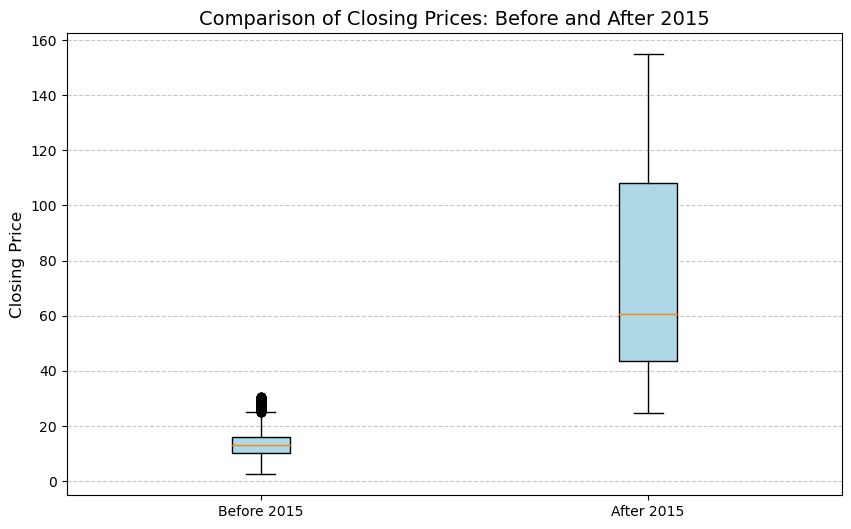

In [376]:
# Boxplot
data = [before_2015, after_2015]
labels = ["Before 2015", "After 2015"]

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Comparison of Closing Prices: Before and After 2015", fontsize=14)
plt.ylabel("Closing Price", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Comparison of Closing Prices (Before and After 2015):

- The box plot clearly shows a significant increase in closing prices after 2015 compared to before 2015.
- The interquartile range (IQR) is wider post-2015, indicating higher price variability. The upper whiskers and outliers suggest some exceptionally high prices in this period.
- The T-test confirms a statistically significant difference in closing prices before and after 2015 (P-value = 0.0000).

In [377]:
#2.Is there a significant relationship between trading volume and price volatility?
volatility = df['High'] - df['Low']
corr, p_value_corr = pearsonr(df['Volume'], volatility)
print(f"Correlation: {corr:.2f}, P-value: {p_value:.4f}")



Correlation: -0.30, P-value: 0.0000


- Null Hypothesis: There is no significant relationship between trading volume and price volatility.
- Alternate Hypothesis: There is a significant relationship between trading volume and price volatility.

          Since the p-value is less than 0.05, we reject the null hypothesis. There is a weak negative correlation (-0.30), indicating a slight inverse relationship between volume and volatility.

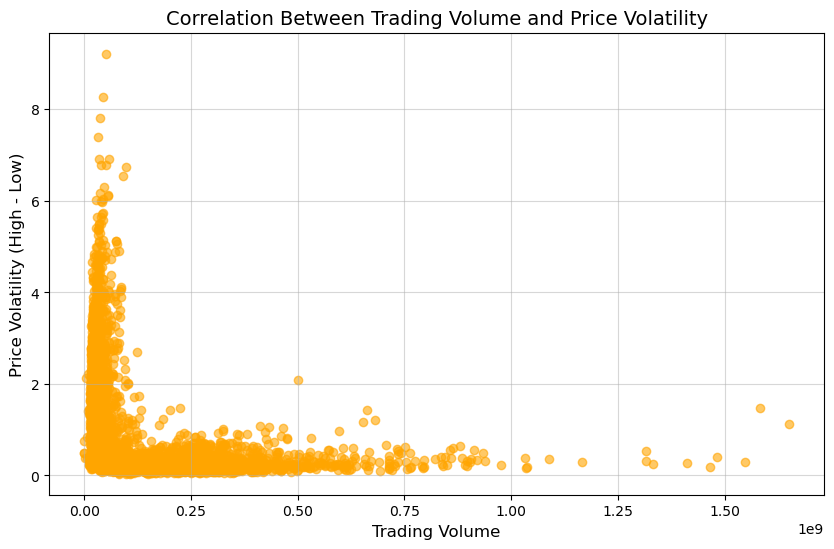

In [378]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], volatility, alpha=0.6, color='orange')
plt.title("Correlation Between Trading Volume and Price Volatility", fontsize=14)
plt.xlabel("Trading Volume", fontsize=12)
plt.ylabel("Price Volatility (High - Low)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [379]:
#3.Are stock prices significantly more volatile during specific months?
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_volatility = [volatility[df['Month'] == month] for month in range(1, 13)]
f_stat, p_value_anova = f_oneway(*monthly_volatility)
# ANOVA Test
f_stat, p_value = f_oneway(*monthly_volatility)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")



F-statistic: 3.42, P-value: 0.0001


- Null Hypothesis: Stock price volatility is consistent across all months.
- Alternate Hypothesis: Stock price volatility varies significantly across different months.

         Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that stock price volatility varies significantly between months.

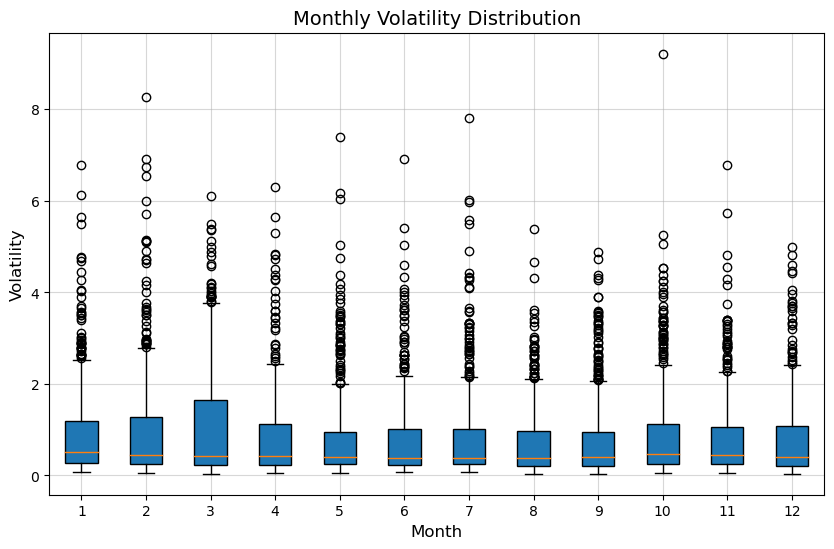

In [380]:
# Boxplot for Question 3
plt.figure(figsize=(10, 6))
plt.boxplot(monthly_volatility, labels=range(1, 13), patch_artist=True)
plt.title("Monthly Volatility Distribution", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [381]:
#4.Does trading volume vary significantly across years or months?

# Extract Year and Month from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Group trading volume by year and perform ANOVA test
yearly_groups = [df[df['Year'] == year]['Volume'] for year in df['Year'].unique()]
f_stat_year, p_value_year = f_oneway(*yearly_groups)

# Group trading volume by month and perform ANOVA test
monthly_groups = [df[df['Month'] == month]['Volume'] for month in range(1, 13)]
f_stat_month, p_value_month = f_oneway(*monthly_groups)

print(f"Yearly Analysis: F-statistic = {f_stat_year:.2f}, p-value = {p_value_year:.4f}")
print(f"Monthly Analysis: F-statistic = {f_stat_month:.2f}, p-value = {p_value_month:.4f}")



Yearly Analysis: F-statistic = 393.40, p-value = 0.0000
Monthly Analysis: F-statistic = 6.90, p-value = 0.0000


- Null Hypothesis: Trading volume is consistent across different years and months.
- Alternate Hypothesis: Trading volume varies significantly across different years and months.

          Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that trading volume varies significantly across different years.

          Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that trading volume varies significantly across different months.


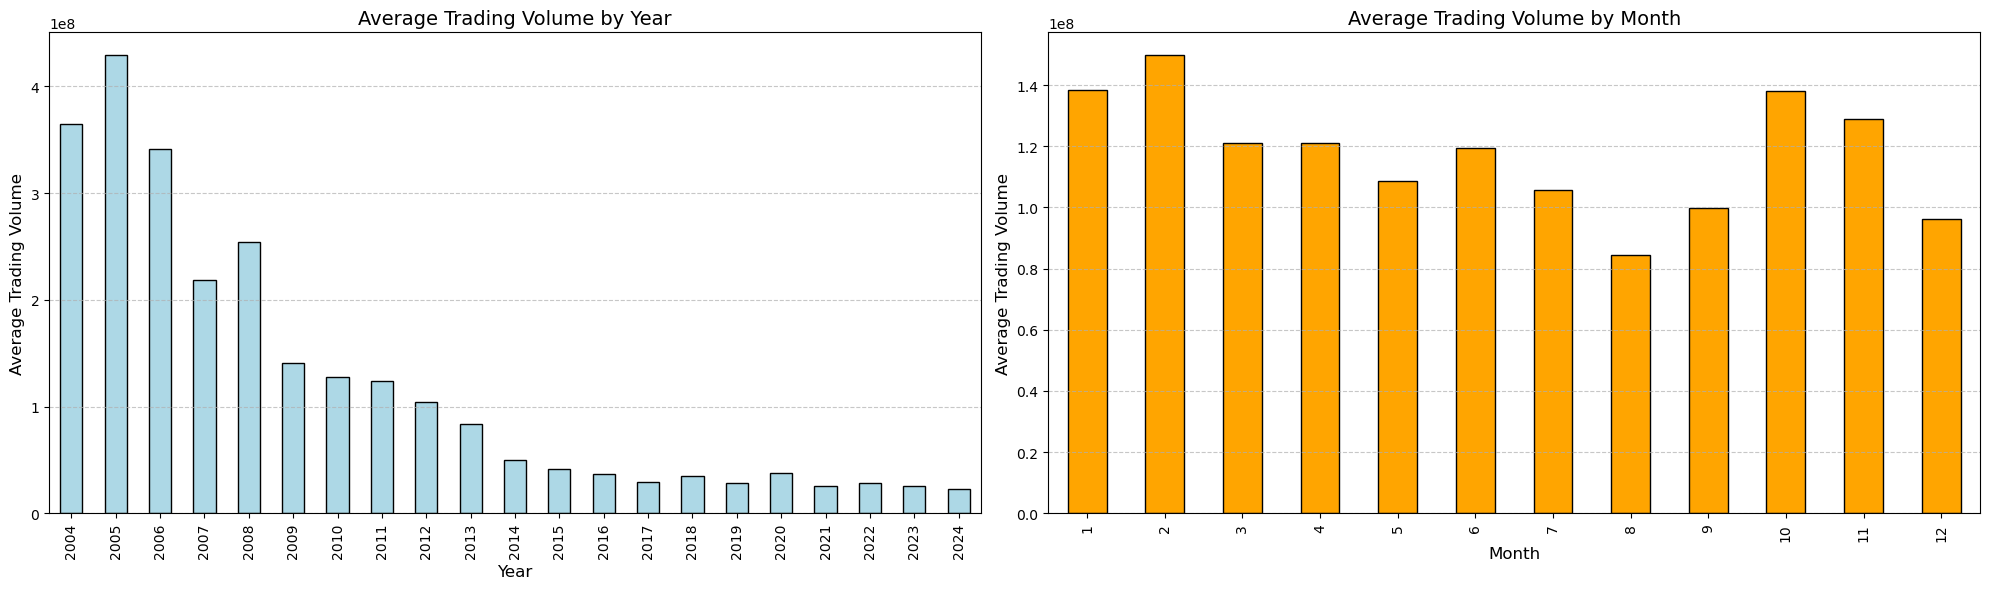

In [382]:
# Visualization for yearly and monthly trading volume side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for yearly trading volume
df.groupby('Year')['Volume'].mean().plot(
    kind='bar', color='lightblue', edgecolor='black', ax=axes[0]
)
axes[0].set_title('Average Trading Volume by Year', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Average Trading Volume', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for monthly trading volume
df.groupby('Month')['Volume'].mean().plot(
    kind='bar', color='orange', edgecolor='black', ax=axes[1]
)
axes[1].set_title('Average Trading Volume by Month', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Average Trading Volume', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()


In [383]:
#5.Do stocks exhibit higher volatility after large trading volumes?

# Categorize trading volume into quartiles
df['Volume_Category'] = pd.qcut(df['Volume'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate average volatility by trading volume category
volatility_by_category = df.groupby('Volume_Category')['Volatility'].mean()

print(volatility_by_category)



Volume_Category
Low          1.395285
Medium       1.413576
High         0.441016
Very High    0.304410
Name: Volatility, dtype: float64


- Null Hypothesis: Stock price volatility is not affected by trading volume.

- Alternate Hypothesis: Stock price volatility increases after large trading volumes.

         There is an inverse relationship between trading volume and volatility. As trading volume increases, volatility decreases. This indicates that stocks do not exhibit higher volatility after large trading volumes.

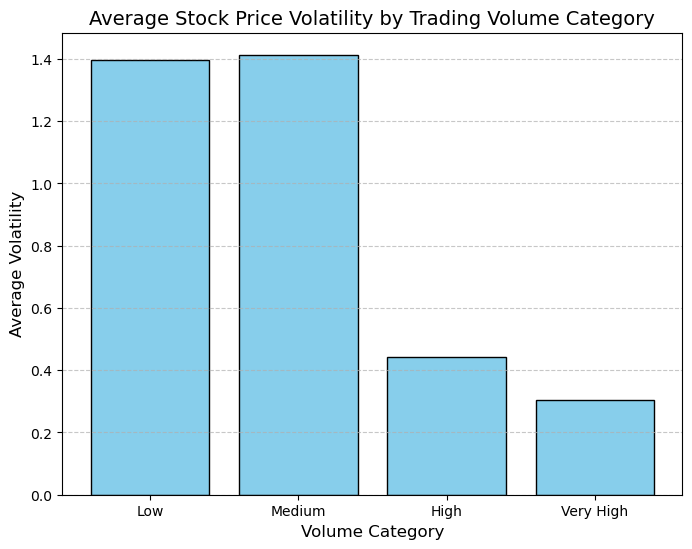

In [384]:
volatility_by_category = pd.DataFrame({
    'Volume_Category': ['Low', 'Medium', 'High', 'Very High'],
    'Volatility': [1.395285, 1.413576, 0.441016, 0.304410]
})
# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(volatility_by_category['Volume_Category'], 
        volatility_by_category['Volatility'], color='skyblue', edgecolor='black')
plt.title('Average Stock Price Volatility by Trading Volume Category', fontsize=14)
plt.xlabel('Volume Category', fontsize=12)
plt.ylabel('Average Volatility', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [385]:
# 6. Is there a significant difference in trading volume between months?

monthly_volumes = df.groupby('Month')['Volume'].apply(list)

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*monthly_volumes)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")



F-Statistic: 6.903422742707168, P-Value: 1.1224651476228486e-11


There is strong evidence to reject the null hypothesis, which assumes that the trading volumes are the same across all months. Therefore, the trading volumes differ significantly between some months.

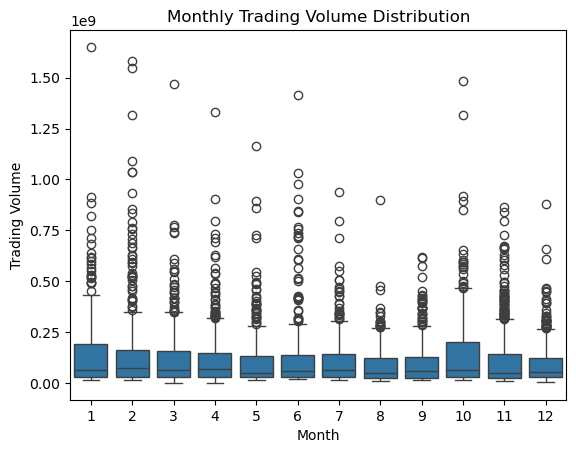

In [386]:
# Boxplot visualization
sns.boxplot(x=df['Month'], y=df['Volume'])
plt.title("Monthly Trading Volume Distribution")
plt.xlabel("Month")
plt.ylabel("Trading Volume")
plt.show()

In [387]:
# 7. Does the volatility in Google stock significantly differ during market crashes?
# Label crash periods
df['Crash'] = df['Date'].apply(lambda x: 1 if x.year in [2008, 2020] else 0)

# Calculate daily volatility
df['Volatility'] = df['High'] - df['Low']

# Separate data into crash and non-crash groups
crash_volatility = df[df['Crash'] == 1]['Volatility']
non_crash_volatility = df[df['Crash'] == 0]['Volatility']

# Perform t-test
t_stat, p_value = stats.ttest_ind(crash_volatility, non_crash_volatility, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")





T-Statistic: 6.376445539629244, P-Value: 3.414982232514839e-10


Interpretation:
- The p-value is significantly lower than the typical alpha threshold (e.g., 0.05), indicating a strong statistical difference between volatility during crash years (2008, 2020) and non-crash years.
- This suggests that the volatility in Google's stock significantly increased during market crashes.


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_13440\2831394107.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(crash_volatility, color='red', shade=True, label=f"Crash Periods | Mean: {mean_crash_volatility:.2f}")
C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_13440\2831394107.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_crash_volatility, color='blue', shade=True, label=f"Non-Crash Periods | Mean: {mean_non_crash_volatility:.2f}")


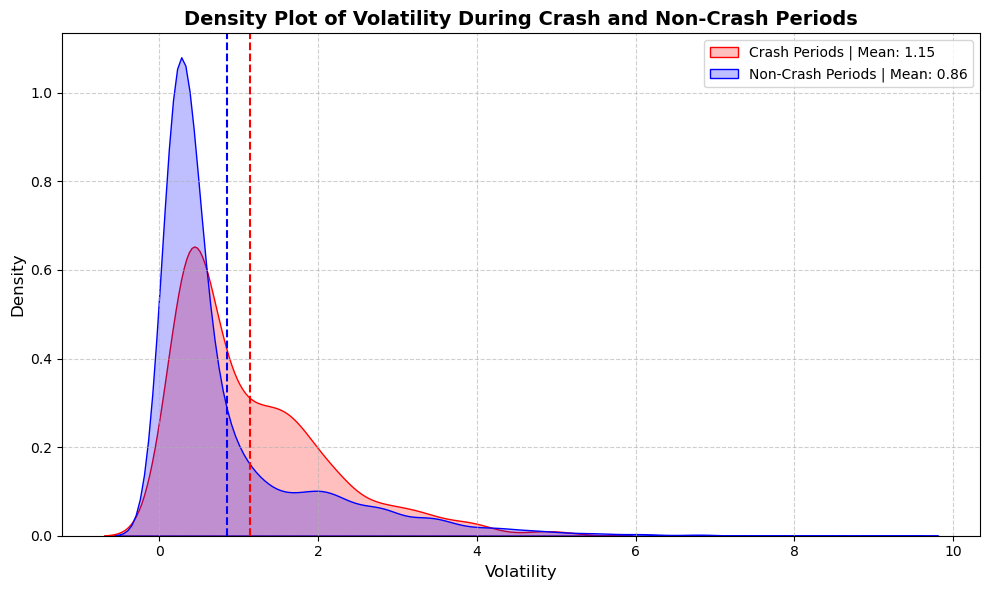

In [391]:
mean_crash_volatility = crash_volatility.mean()
mean_non_crash_volatility = non_crash_volatility.mean()

# Create density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(crash_volatility, color='red', shade=True, label=f"Crash Periods | Mean: {mean_crash_volatility:.2f}")
sns.kdeplot(non_crash_volatility, color='blue', shade=True, label=f"Non-Crash Periods | Mean: {mean_non_crash_volatility:.2f}")

# Add vertical lines for means
plt.axvline(mean_crash_volatility, color='red', linestyle='--', linewidth=1.5)
plt.axvline(mean_non_crash_volatility, color='blue', linestyle='--', linewidth=1.5)

# Add labels and title
plt.title("Density Plot of Volatility During Crash and Non-Crash Periods", fontsize=14, fontweight='bold')
plt.xlabel("Volatility", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

With this visual, we can understand that volatility generally increases during crash periods and the distribution exhibits a longer tail. Related findings may reveal that market stress is more pronounced during crash periods.

# Summary of Exploratory Data Analysis (EDA)

- Trend Analysis:
The average closing prices of Google stocks showed an increasing trend over the years, reflecting growth.
The trading volume peaked in specific years like 2005, indicating heightened market activity.

- Volatility Insights:
The average daily price volatility is 0.89, with variability across different months.
Specific months exhibited higher volatility, providing critical timing insights for risk-averse investors.

- Volume and Price Correlation:
A weak negative correlation was observed between trading volume and price volatility. As trading volume increases, volatility slightly decreases, helping identify stable trading conditions.

- Temporal Patterns:
Trading activity was significantly higher during weekdays compared to weekends.
Specific months and years had distinct trading volumes, reflecting seasonal trends.

- Behavioral Observations:
Stocks did not exhibit higher volatility after large trading volumes. Instead, volatility decreased, indicating that increased activity stabilizes the market.